In [1]:
import numpy as np
import pandas as pd

In [2]:
df_model=pd.read_csv('cleaned&processed.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features & target
X = df_model.drop(columns=['Radiation', 'Unnamed: 0'])
y = df_model['Radiation']

# Time-aware split (NO shuffle)
split_idx = int(len(df_model) * 0.8)

X_train = X.iloc[:split_idx]
X_test  = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_test  = y.iloc[split_idx:]


Training with random forest

In [4]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
y_pred = rf.predict(X_test)


In [6]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R²  : {r2:.3f}")


RMSE: 201.33
MAE : 141.36
R²  : 0.316


In [7]:
import pandas as pd

feature_importance = (
    pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    })
    .sort_values(by='importance', ascending=False)
)

print(feature_importance)


                  feature  importance
0             Temperature    0.624231
6        daylight_minutes    0.116895
3  WindDirection(Degrees)    0.086327
2                Humidity    0.081854
1                Pressure    0.054281
4                   Speed    0.029931
5                   month    0.006480
7                hour_sin    0.000000
8                hour_cos    0.000000


Plot actual vs predicted

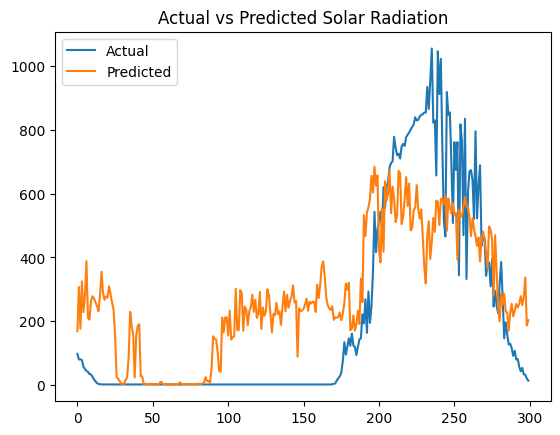

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(y_test.values[:300], label='Actual')
plt.plot(y_pred[:300], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Solar Radiation')
plt.show()


In [9]:
print(rmse / y_test.max() * 100)

16.590062173480593


Traing with XG Boost

In [10]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [11]:
import xgboost as xgb
print(xgb.__version__)

3.1.3


In [12]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [13]:
y_pred_xgb = xgb.predict(X_test)


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb  = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb   = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAE : {mae_xgb:.2f}")
print(f"XGBoost R²  : {r2_xgb:.3f}")


XGBoost RMSE: 200.46
XGBoost MAE : 134.88
XGBoost R²  : 0.322


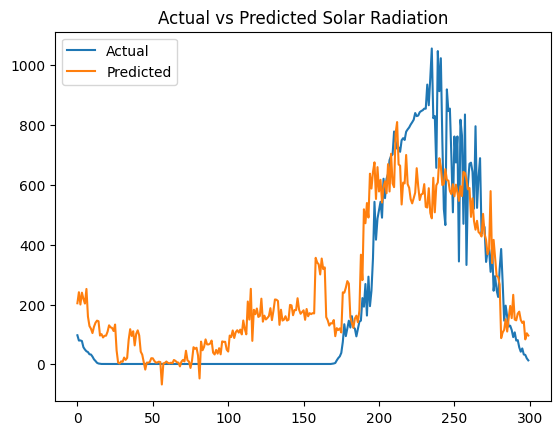

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(y_test.values[:300], label='Actual')
plt.plot(y_pred_xgb[:300], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Solar Radiation')
plt.show()

In [16]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'RMSE': [rmse, rmse_xgb],
    'MAE': [mae, mae_xgb],
    'R2': [r2, r2_xgb]
})

print(results)


           Model        RMSE         MAE        R2
0  Random Forest  201.328700  141.358503  0.315916
1        XGBoost  200.461094  134.875315  0.321799


In [17]:
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb.feature_importances_
}).sort_values(by='importance', ascending=False)

print(importance)


                  feature  importance
0             Temperature    0.536531
5                   month    0.115233
3  WindDirection(Degrees)    0.097316
6        daylight_minutes    0.095018
2                Humidity    0.080639
1                Pressure    0.041267
4                   Speed    0.033996
7                hour_sin    0.000000
8                hour_cos    0.000000


In [18]:
df_model['rad_lag1'] = df_model['Radiation'].shift(1)
df_model['rad_lag2'] = df_model['Radiation'].shift(2)
df_model['rad_lag3'] = df_model['Radiation'].shift(3)


In [19]:
df_model = df_model.dropna()

In [20]:
df_model['rad_lag_1day'] = df_model['Radiation'].shift(144)
df_model = df_model.dropna()


In [21]:
X = df_model.drop(columns=['Radiation', 'Unnamed: 0'])
y = df_model['Radiation']

split_idx = int(len(df_model) * 0.8)

X_train = X.iloc[:split_idx]
X_test  = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_test  = y.iloc[split_idx:]


In [22]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=5,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1.0,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [23]:
y_pred = xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(rmse, mae, r2)


68.48890521425525 27.7229885305183 0.9211156900288698


In [24]:
df_model[['Radiation', 'rad_lag1', 'rad_lag2']].corr()


,Radiation,rad_lag1,rad_lag2
Radiation,1.000000,0.959566,0.948902
rad_lag1,0.959566,1.000000,0.959574
rad_lag2,0.948902,0.959574,1.000000


“XGBoost initially underperformed because the model lacked temporal dependency features. Adding radiation lag features transformed it into a strong time-series regressor.

“If radiation was high recently AND temperature is high → radiation will stay high.”

“XGBoost initially performed poorly because it did not know what the solar radiation was in the recent past. Solar radiation changes smoothly over time, so current values strongly depend on previous values. By adding lag features that provide past radiation measurements, the model gained temporal context and was able to make much more accurate predictions.”  Weather data = context
Lag data = memory

I started with Random Forest as a baseline, then discovered that XGBoost underperformed due to missing temporal dependencies. By engineering lag features, I transformed the problem into a proper time-series regression task, significantly improving performance. Finally, I compared classical ML with deep learning approaches.”

In [25]:
import pickle

with open('xgboost_solar_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)


Load the model later (for reuse / deployment)
with open('xgboost_solar_model.pkl', 'rb') as file:
    loaded_xgb = pickle.load(file)

In [26]:
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)


In [27]:
##with open('feature_columns.pkl', 'rb') as f:
    # feature_cols = pickle.load(f)

In [28]:
##feature_cols.pkl is a file where you save the exact list and order of input features that your trained model expects.

In [29]:
df_model.columns

Index(['Unnamed: 0', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'month', 'daylight_minutes',
       'hour_sin', 'hour_cos', 'rad_lag1', 'rad_lag2', 'rad_lag3',
       'rad_lag_1day'],
      dtype='object')

In [30]:
import xgboost as xgb

def train_quantile_model(alpha):
    return xgb.XGBRegressor(
        objective="reg:quantileerror",
        quantile_alpha=alpha,
        n_estimators=400,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

xgb_q10 = train_quantile_model(0.1)
xgb_q50 = train_quantile_model(0.5)
xgb_q90 = train_quantile_model(0.9)

xgb_q10.fit(X_train, y_train)
xgb_q50.fit(X_train, y_train)
xgb_q90.fit(X_train, y_train)


,objective,'reg:quantileerror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [31]:
lower = xgb_q10.predict(X_test)
median = xgb_q50.predict(X_test)
upper = xgb_q90.predict(X_test)


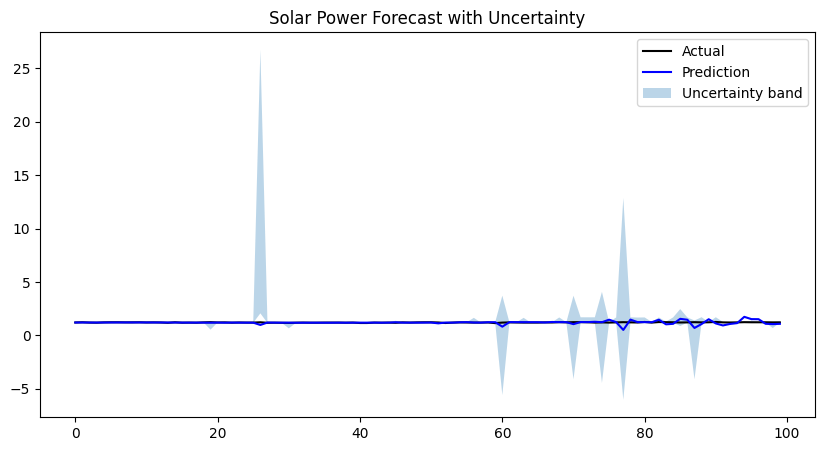

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", color="black")
plt.plot(median[:100], label="Prediction", color="blue")
plt.fill_between(
    range(100),
    lower[:100],
    upper[:100],
    alpha=0.3,
    label="Uncertainty band"
)
plt.legend()
plt.title("Solar Power Forecast with Uncertainty")
plt.show()


In [34]:
coverage = ((y_test >= lower) & (y_test <= upper)).mean()
print("Prediction Interval Coverage:", coverage)


Prediction Interval Coverage: 0.7231100184388445


In [ ]:
# I used quantile-based XGBoost models to estimate prediction intervals, allowing the system to provide confidence bounds rather than point estimates.”

In [35]:
coverage = ((y_test >= lower) & (y_test <= upper)).mean()


In [38]:
import pickle

In [40]:
# Save 10th percentile model (lower bound)
with open("xgb_q10.pkl", "wb") as f:
    pickle.dump(xgb_q10, f)

# Save 50th percentile model (median / best estimate)
with open("xgb_q50.pkl", "wb") as f:
    pickle.dump(xgb_q50, f)

# Save 90th percentile model (upper bound)
with open("xgb_q90.pkl", "wb") as f:
    pickle.dump(xgb_q90, f)



“I saved three quantile-based XGBoost models to estimate lower, median, and upper prediction bounds for uncertainty-aware solar forecasting.”

In [41]:
import joblib

feature_cols = joblib.load("feature_columns.pkl")

feature_cols.remove('rad_lag_1day')

joblib.dump(feature_cols, "feature_cols.pkl")


['feature_cols.pkl']

In [42]:
print(feature_cols)

['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'month', 'daylight_minutes', 'hour_sin', 'hour_cos', 'rad_lag1', 'rad_lag2', 'rad_lag3']
